In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import pingouin as pg
import seaborn as sns

In [4]:
df = pd.read_csv('vhv_11_15.csv')

In [5]:
df['emotionally'].describe()

count               571
unique                6
top       very relevant
freq                190
Name: emotionally, dtype: object

In [6]:
df['emotionally'].value_counts()

very relevant          190
somewhat relevant      140
extremely relevant      84
sightly relevant        73
not very relevant       45
not at all relevant     39
Name: emotionally, dtype: int64

In [ ]:
def assess_var(var):
    skew = var.skew()
    kurt = var.kurtosis()
    return f'The skewness is {skew} and the kurtosis is {kurt}.'
assess_var(df['emotionally'])
# only relevant for continuous variables

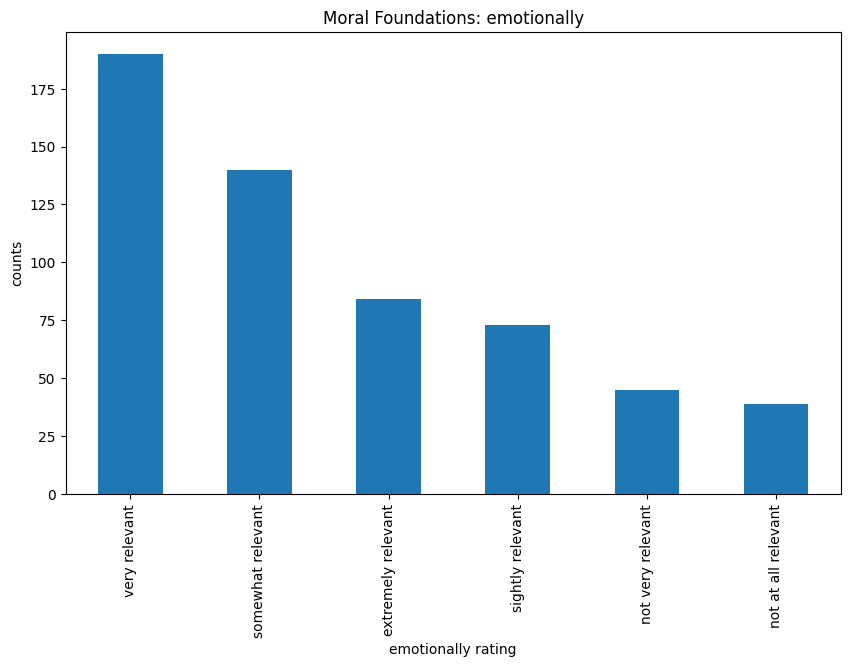

In [15]:
df['emotionally'].value_counts().plot(kind='bar', figsize=(10, 6))

pyplot.xlabel('emotionally rating') # add to x-label to the plot
pyplot.ylabel('counts') # add y-label to the plot
pyplot.title('Moral Foundations: emotionally') # add title to the plot

pyplot.show()

In [7]:
df['emotionally'].isnull().value_counts()

False    571
True       4
Name: emotionally, dtype: int64

In [17]:
df['MFQ_HARM_AVGscale'] = (df['emotionally']+df['weak+cruel']+df['animal']+df['kill']+df['compassion'])/6  
df['MFQ_FAIRNESS_AVGscale'] = (df['rights']+df['unfairly']+df['treated']+df['justice']+df['fairly']+df['rich'])/6  
df['MFQ_INGROUP_AVGscale'] = (df['loyalty']+df['betray']+df['lovecountry']+df['team']+df['history']+df['family'])/6  
df['MFQ_AUTHORITY_AVGscale'] = (df['traditions']+df['respect']+df['chaos']+df['sexroles']+df['soldier']+df['kidrespect'])/6  
df['MFQ_PURITY_AVGscale'] = (df['disgusting']+df['decency']+df['god']+df['harmlessdg']+df['unnatural']+df['chastity'])/6  
df['MFQ_PROGRESSIVISMscale'] = (df['MFQ_HARM_AVGscale'] + df['MFQ_FAIRNESS_AVGscale'])/2 - (df['MFQ_INGROUP_AVGscale'] + df['MFQ_AUTHORITY_AVGscale'] + df['MFQ_PURITY_AVGscale'])/3

#Trust in Science and Scientists inventory:
df['no_trust'] = (df['scitrust1_r'] + df['scitrust2_r'] + df['scitrust3_r'] + df['scitrust4_r']+ df['scitrust6_r'] + df['scitrust8_r'] + df['scitrust13_r'] + df['scitrust17_r'] + df['scitrust18_r'] + df['scitrust19_r'] + df['scitrust20_r'] + df['scitrust21_r'])
df['yes_trust'] = (df['scitrust5'] + df['scitrust7'] + df['scitrust9'] + df['scitrust10'] + df['scitrust11']+ df['scitrust12'] + df['scitrust14'] + df['scitrust15'] + df['scitrust16'])
df['trust-science'] = (-1*df['no_trust'] + df['yes_trust'])/21 

TypeError: unsupported operand type(s) for /: 'str' and 'int'